# Imports and function definitions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [2]:
def time_to_unique(N, verbose=False):
    """Roll until all unique, as in riddler"""
    initials = np.arange(N) + 1
    i = 0
    while(True):
        initials = np.random.choice(initials, size=N, replace=True)
        if verbose:
            print(initials)
        i += 1
        if len(np.unique(initials)) == 1:
            break
    return i

# The answer
## 6-sided die
First, we test a 6-sided die. Let's just Monte Carlo this, and see the answer.

In [3]:
times = [time_to_unique(6) for i in range(10000)]
times = np.array(times)

So, what is our answer?

In [4]:
print(f'{times.mean():.2f} +/- {np.std(times, ddof=1)/np.sqrt(len(times)):.2f}')

9.63 +/- 0.06


So, we have about 9.7 as our average (expectation) value for the number of iterations of this process.

What does the distribution look like?

In [5]:
logNorm = stats.lognorm.fit(times, floc=0, scale=np.exp(np.mean(times)))

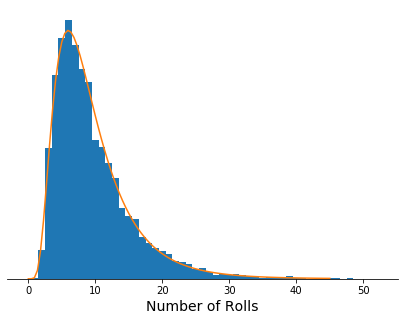

In [6]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(7, 5)
ax.hist(times, bins=np.arange(-0.5, times.max() + 0.5, 1), density=True)
# ax.axvline(np.mean(times))
ax.plot(np.linspace(0, 45, 100), stats.lognorm.pdf(np.linspace(0, 45, 100), *logNorm),
       label='Fit')
ax.set_xlabel('Number of Rolls', fontsize=14)
# ax.set_ylabel('Probability', fontsize=14)
for axis in ['top', 'right', 'left']:
    ax.spines[axis].set_visible(False)
ax.axes.get_yaxis().set_visible(False)


Interestingly, it looks like a [log-normal](https://en.wikipedia.org/wiki/Log-normal_distribution) distribution. There are reasons to think it might be a reasonable approximation, due to the multiplicative nature of the procedure. Of course, the outcomes are a discrete distribution, so fitting a continuous distribution is not ideal.

Turns out when we fit the distribution, it works pretty well.

## N-sided dice

Let's look at the trends here as we increase the number of sides on a die. We of course expect the number of trials to increase with $N$.

In [7]:
times = np.zeros((20, 1000))
for i, N in enumerate(np.arange(len(times)) + 1):
    times[i] = np.array([time_to_unique(N) for j in range(len(times[0]))])

Text(0, 0.5, 'Number of Rolls')

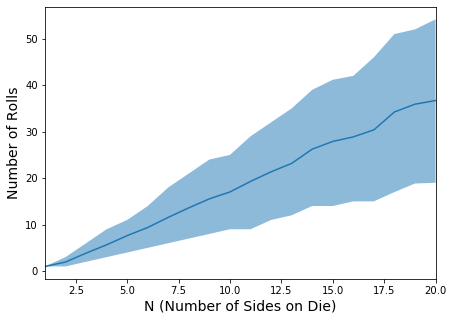

In [8]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(7, 5)
ax.fill_between(np.arange(len(times)) + 1, np.percentile(times, 16, axis=1),
                    np.percentile(times, 84, axis=1), alpha=0.5)
ax.plot(np.arange(len(times)) + 1, np.mean(times, axis=1))
ax.set_xlim([1, 20])

ax.set_xlabel('N (Number of Sides on Die)', fontsize=14)
ax.set_ylabel('Number of Rolls', fontsize=14)

Here we see that there appears to be a linear relationship between $N$, the number of sides on the die, and the mean number of rolls. The plot above also shows the inner 68% scatter, which grows linearly.